In [15]:
import yt
import os
import numpy as np
import matplotlib.pyplot as plt

def KlebeRichtigZusammen(ad, var):
  xs = [float(grid.LeftEdge[0]) for grid in ad.index.grids]
  enumerated = list(enumerate(xs))
  sorted_keys = [k for (k,v) in sorted(enumerated, key=lambda xs: xs[1])]
  grids = [np.array(ad.index.grids[k][var]) for k in sorted_keys]
  grids = [x.reshape((x.shape[0],)) for x in grids]
  p = np.concatenate(grids)
  return p

def PrintProgress(i, plotfiles):
  ny = len(plotfiles)
  progress = int(100.0 * float(i) / (ny - 1))
  print('[{:3d}%] Reading plotfile {}'.format(progress, plotfiles[i]))

yt.funcs.mylog.setLevel(50)
#output_dir = '/group/ag_klima/SFB1029_C01/SEC_Plenum/Plotfiles/Tube1'
output_dir = '/srv/public/Maikel/FiniteVolumeSolver/build_2D-Release/SEC_Plenum_TurbineBoundary/Plotfiles/Tube1'

dirs = os.listdir(output_dir)
plotfiles = ['{}/{}'.format(output_dir, plt) for plt in dirs]
list.sort(plotfiles)
plotfiles = plotfiles[::5]
# plotfiles = plotfiles[0:2]
ds = yt.load(plotfiles[1])

print(ds.index.grids[0])

ad = ds.all_data()
p = KlebeRichtigZusammen(ad, 'Pressure')
F = KlebeRichtigZusammen(ad, 'Species_0')
FR = KlebeRichtigZusammen(ad, 'Species_1')

nx = p.shape[0]
ny = len(plotfiles)

PrintProgress(0, plotfiles)
x0 = ad.index.grids[0].LeftEdge[0]
xEnd = ad.index.grids[-1].RightEdge[0]
ts = np.zeros((ny,1))
ts[0] = ds.current_time
imdata = np.zeros(shape=(nx, ny, 3))
imdata[:,0, 0] = p
imdata[:,0, 1] = F
imdata[:,0, 2] = FR

for i in range(1,ny):
  PrintProgress(i, plotfiles)
  ds = yt.load(plotfiles[i])
  ad = ds.all_data()
  p = KlebeRichtigZusammen(ad, 'Pressure')
  F = KlebeRichtigZusammen(ad, 'Species_0')
  FR = KlebeRichtigZusammen(ad, 'Species_1')
  imdata[:,i,0] = p
  imdata[:,i,1] = F
  imdata[:,i,2] = FR
  ts[i] = ds.current_time


BoxlibGrid_0000
[  0%] Reading plotfile /srv/public/Maikel/FiniteVolumeSolver/build_2D-Release/SEC_Plenum_TurbineBoundary/Plotfiles/Tube1/plt000000000
[  0%] Reading plotfile /srv/public/Maikel/FiniteVolumeSolver/build_2D-Release/SEC_Plenum_TurbineBoundary/Plotfiles/Tube1/plt000000083
[  1%] Reading plotfile /srv/public/Maikel/FiniteVolumeSolver/build_2D-Release/SEC_Plenum_TurbineBoundary/Plotfiles/Tube1/plt000000168
[  2%] Reading plotfile /srv/public/Maikel/FiniteVolumeSolver/build_2D-Release/SEC_Plenum_TurbineBoundary/Plotfiles/Tube1/plt000000255
[  2%] Reading plotfile /srv/public/Maikel/FiniteVolumeSolver/build_2D-Release/SEC_Plenum_TurbineBoundary/Plotfiles/Tube1/plt000000345
[  3%] Reading plotfile /srv/public/Maikel/FiniteVolumeSolver/build_2D-Release/SEC_Plenum_TurbineBoundary/Plotfiles/Tube1/plt000000444
[  4%] Reading plotfile /srv/public/Maikel/FiniteVolumeSolver/build_2D-Release/SEC_Plenum_TurbineBoundary/Plotfiles/Tube1/plt000000572
[  4%] Reading plotfile /srv/public/Mai

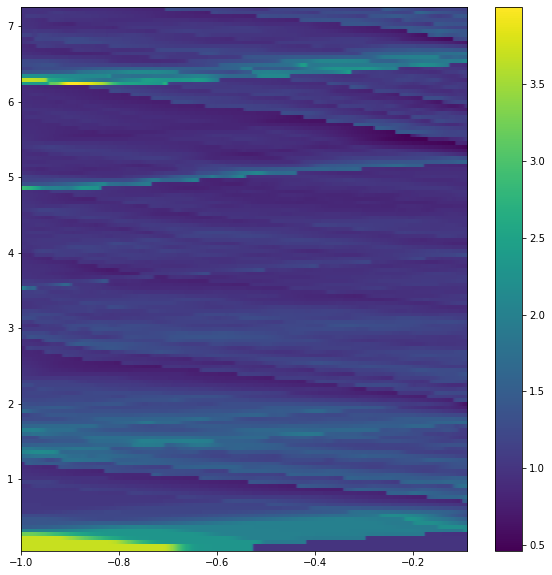

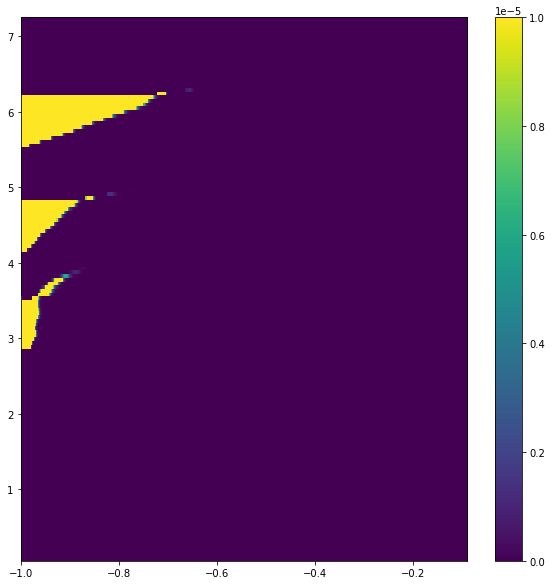

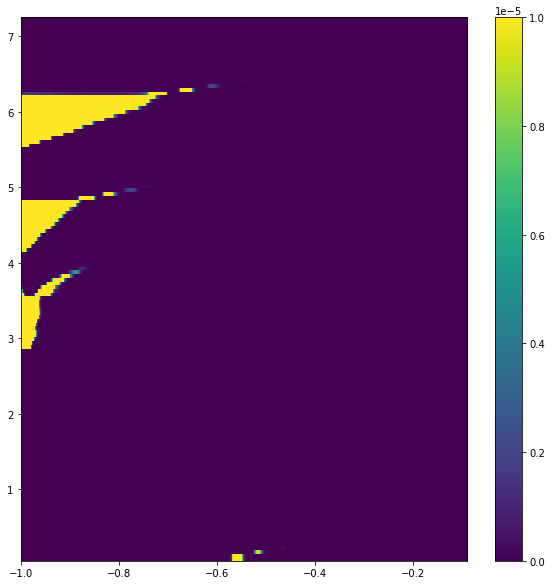

In [16]:
import matplotlib.pyplot as plt

#plt.plot(imdata[:,1])
f = plt.figure(figsize=(10, 10))
im = plt.imshow(imdata[:,:,0].T, origin='lower', interpolation='none', extent=(x0, xEnd, ts[0], ts[-1]), aspect='auto')
plt.colorbar(im)
plt.show()

f = plt.figure(figsize=(10, 10))
im = plt.imshow(imdata[:,:,1].T, vmin=0.0, vmax=1e-5, origin='lower', interpolation='none', extent=(x0, xEnd, ts[0], ts[-1]), aspect='auto')
plt.colorbar(im)
plt.show()

f = plt.figure(figsize=(10, 10))
im = plt.imshow(imdata[:,:,2].T, vmin=0.0, vmax=1e-5, origin='lower', interpolation='none', extent=(x0, xEnd, ts[0], ts[-1]), aspect='auto')
plt.colorbar(im)
plt.show()